In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import dask.dataframe as dd
from geopy.distance import geodesic
import string
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, skew

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
dir = '../csv/'
fname = 'sample_300k_2020'

In [5]:
df_BASE = pd.read_pickle(fname + '_eda.pkl')

In [6]:
print('df_eda shape: ' + str(df_BASE.shape))
print(df_BASE.info())

df_eda shape: (299996, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 299996 entries, 70705 to 127819
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   cc_num                     299996 non-null  int64         
 1   gender                     299996 non-null  object        
 2   city                       299996 non-null  object        
 3   state                      299996 non-null  object        
 4   zip                        299996 non-null  int32         
 5   lat                        299996 non-null  float64       
 6   long                       299996 non-null  float64       
 7   city_pop                   299996 non-null  int64         
 8   job                        299996 non-null  object        
 9   dob                        299996 non-null  datetime64[ns]
 10  acct_num                   299996 non-null  int64         
 11  profile                   

In [ ]:
#df_tmp_sample = df_BASE.sample(20000, random_state=42)
#df_tmp_sample.head()
#df_tmp_sample.to_csv('cleanse_sample.csv', index=False)

,cc_num,gender,city,state,zip,lat,long,city_pop,job,dob,...,age,age_group,cc_type,area_cat,distance,time_since_last_trans,job_cat,log_amt,log_time_since_last_trans,log_city_pop
84518,4876725449176,m,el_paso,TX,79901,31.7584,-106.4783,749635,journalist_broadcasting,1971-04-20,...,49,middle_aged,Visa,urban,31.420606,82.250556,Media,2.218116,4.421855,13.527343
243808,180046766454446,m,beaumont,TX,77706,30.0948,-94.1648,142692,glass_blower/designer,1985-03-16,...,35,young_adult,Unknown,urban,24.835367,448.218889,Design,3.581851,6.107510,11.868451
198044,3500207906473954,f,deville,LA,71328,31.3587,-92.2233,7414,architectural_technologist,1995-01-15,...,25,young_adult,Unknown,urban,75.452431,343.881389,Architecture,4.711420,5.843201,8.911260
252405,2254348256499718,f,sanford,FL,32771,28.8013,-81.2850,78268,surveyor_insurance,1979-03-14,...,41,middle_aged,MasterCard,urban,34.209422,50.539167,Surveying,4.925223,3.942342,11.267907
148980,6011081832815959,f,san_marcos,TX,78666,29.8754,-97.9404,63836,production_engineer,2003-02-17,...,17,teenager,Maestro,urban,72.772104,173.887500,Engineering,1.244155,5.164143,11.064088


In [9]:
df_BASE.describe()

,cc_num,zip,lat,long,city_pop,dob,acct_num,trans_date,trans_time,unix_time,...,merch_long,trans_day_of_week,is_weekend,trans_hour,age,distance,time_since_last_trans,log_amt,log_time_since_last_trans,log_city_pop
count,2.999960e+05,299996.000000,299996.000000,299996.000000,2.999960e+05,299996,2.999960e+05,299996,299996,2.999960e+05,...,299996.000000,299996.000000,299996.000000,299996.000000,299996.000000,299996.000000,299996.000000,299996.000000,299996.000000,299996.000000
mean,3.717795e+17,51171.855838,37.571051,-91.975277,2.963910e+05,1978-10-26 15:28:08.134508512,4.979541e+11,2020-07-20 12:21:51.569486848,1900-01-01 17:16:10.421028608,1.595290e+09,...,-91.974516,3.555834,0.398735,16.768957,41.680929,76.509002,427.354072,3.350546,5.086118,11.059976
min,6.040003e+10,1002.000000,19.589300,-163.118900,4.400000e+01,1928-01-05 00:00:00,1.837412e+07,2020-01-01 00:00:00,1900-01-01 00:00:02,1.577817e+09,...,-163.841588,0.000000,0.000000,0.000000,12.000000,0.061514,0.000000,0.693147,0.000000,3.806662
25%,3.851192e+13,27607.000000,33.892500,-98.574675,1.771500e+04,1967-07-20 00:00:00,2.469957e+11,2020-04-26 00:00:00,1900-01-01 14:25:48.750000128,1.587903e+09,...,-98.837592,2.000000,0.000000,14.000000,28.000000,55.620571,77.872153,2.222459,4.367828,9.782223
50%,3.506154e+15,48135.000000,38.561700,-87.155400,6.079700e+04,1981-07-05 00:00:00,4.975043e+11,2020-07-23 00:00:00,1900-01-01 17:37:42,1.595500e+09,...,-87.029545,4.000000,0.000000,17.000000,39.000000,78.718629,239.562222,3.530763,5.482979,11.015312
75%,4.589685e+15,78250.000000,41.240500,-79.987000,2.368230e+05,1992-12-13 00:00:00,7.507955e+11,2020-10-22 00:00:00,1900-01-01 20:50:01.249999872,1.603359e+09,...,-79.732730,5.000000,1.000000,20.000000,53.000000,98.924832,551.475208,4.348890,6.314409,12.375073
max,4.999689e+18,99929.000000,66.693300,-67.407300,2.906700e+06,2008-11-24 00:00:00,9.999583e+11,2020-12-31 00:00:00,1900-01-01 23:59:59,1.609439e+09,...,-66.409911,6.000000,1.000000,23.000000,92.000000,148.455852,7923.052500,10.086139,8.977658,14.882529
std,1.237935e+18,29682.908465,5.183478,16.478501,5.705556e+05,NaN,2.893002e+11,NaN,NaN,9.051101e+06,...,16.489041,1.949197,0.489639,4.532406,17.892554,29.203572,560.720134,1.319984,1.854300,1.920083


In [18]:
df_BASE.head()  

,cc_num,gender,city,state,zip,lat,long,city_pop,job,dob,...,age,age_group,cc_type,area_cat,distance,time_since_last_trans,job_cat,log_amt,log_time_since_last_trans,log_city_pop
70705,3510694985435665,f,sidney,NE,69162,41.138,-102.9856,7765,energy_manager,1941-05-26,...,79,senior,Unknown,urban,92.807059,0.000000,Management,2.240710,0.000000,8.957511
69722,3510694985435665,f,sidney,NE,69162,41.138,-102.9856,7765,energy_manager,1941-05-26,...,79,senior,Unknown,urban,111.944237,76.854444,Management,1.808289,4.354841,8.957511
69411,3510694985435665,f,sidney,NE,69162,41.138,-102.9856,7765,energy_manager,1941-05-26,...,79,senior,Unknown,urban,98.159778,1198.525278,Management,4.550608,7.089681,8.957511
70857,3510694985435665,f,sidney,NE,69162,41.138,-102.9856,7765,energy_manager,1941-05-26,...,79,senior,Unknown,urban,41.599238,638.237778,Management,4.370081,6.460276,8.957511
69729,3510694985435665,f,sidney,NE,69162,41.138,-102.9856,7765,energy_manager,1941-05-26,...,79,senior,Unknown,urban,83.879382,170.932222,Management,2.599722,5.147100,8.957511


In [20]:
df_BASE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299996 entries, 70705 to 127819
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   cc_num                     299996 non-null  int64         
 1   gender                     299996 non-null  object        
 2   city                       299996 non-null  object        
 3   state                      299996 non-null  object        
 4   zip                        299996 non-null  int32         
 5   lat                        299996 non-null  float64       
 6   long                       299996 non-null  float64       
 7   city_pop                   299996 non-null  int64         
 8   job                        299996 non-null  object        
 9   dob                        299996 non-null  datetime64[ns]
 10  acct_num                   299996 non-null  int64         
 11  profile                    299996 non-null  object   

In [19]:
df_cleanse = df_BASE.copy()

---
1. Missing Values Heatmap
---

In [28]:
# Check for missing values across all columns
missing_summary = df_cleanse.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

missing_summary

Series([], dtype: int64)

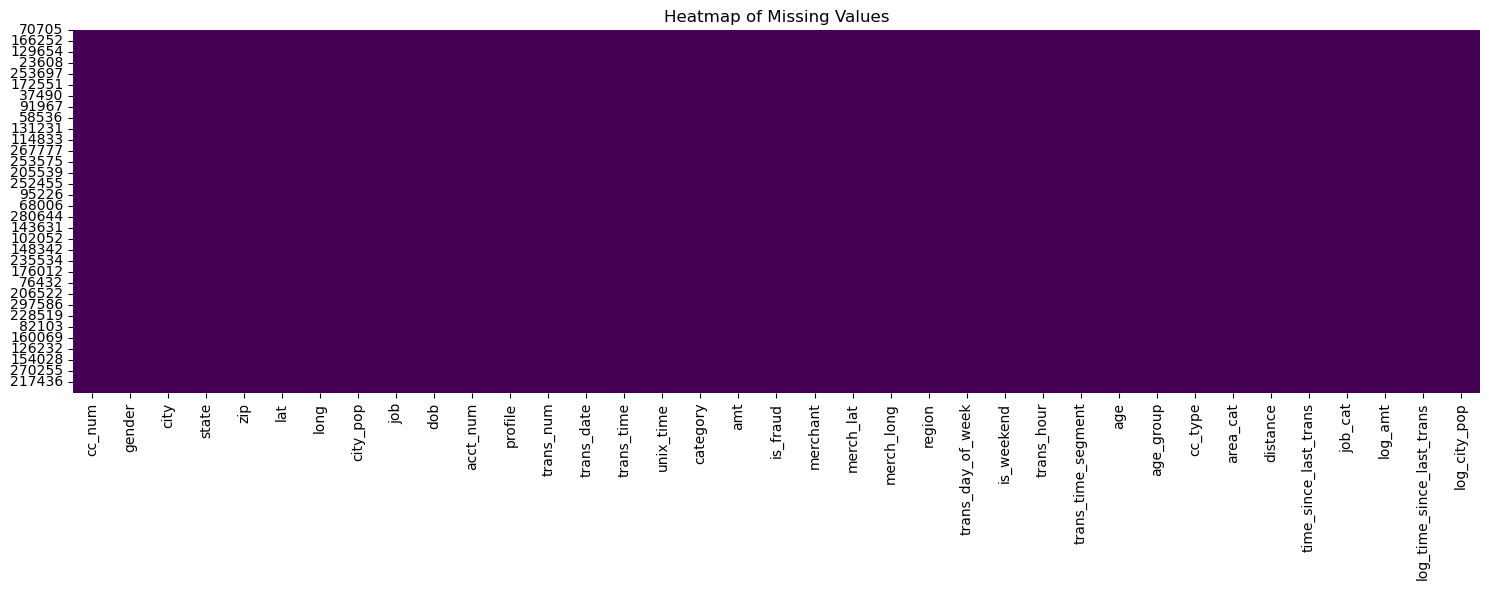

In [27]:

plt.figure(figsize=(15, 6))
sns.heatmap(df_cleanse.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.tight_layout()
plt.show()

---
2. Outlier Detection (Boxplots)
---

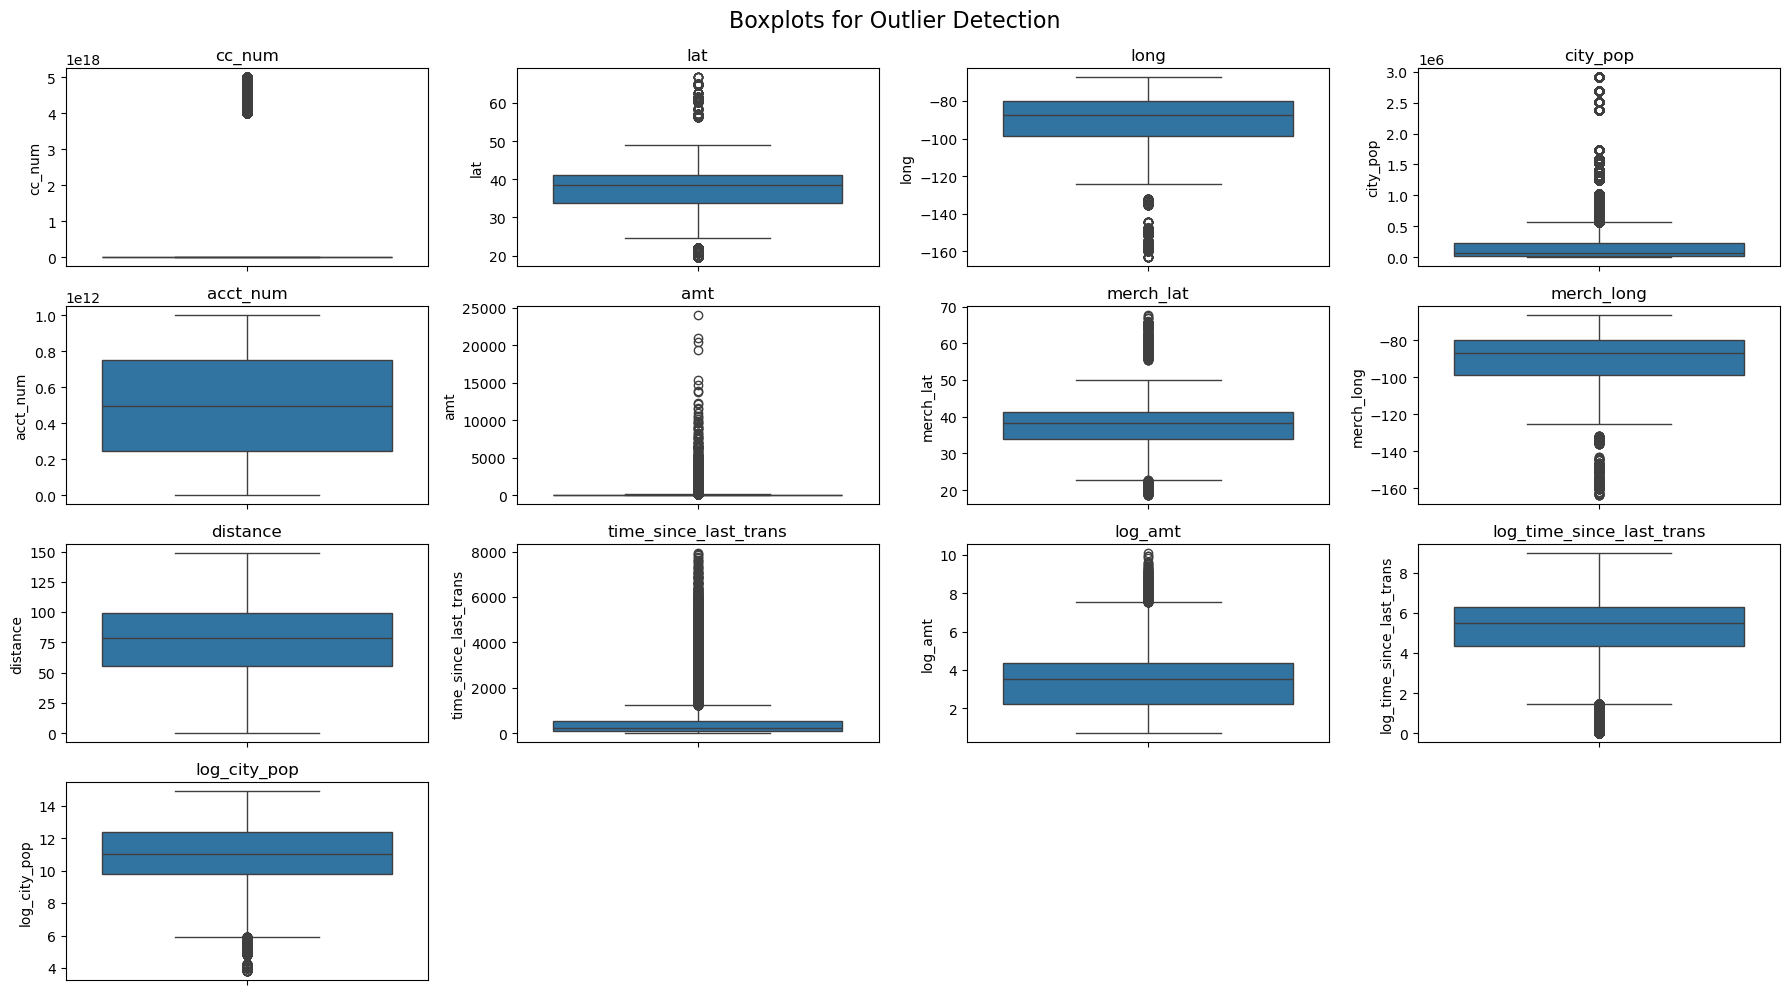

In [25]:
# Select numerical columns for outlier inspection
df_num = df_cleanse.copy()
#df_num = df_num.drop(["is_fraud"], axis=1, inplace=True)
numeric_cols = df_num.select_dtypes(include=["float64", "int64"]).columns   #drop("is_fraud")

# Plot boxplots for each numeric column
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df_num, y=col)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

**🧼 Data Cleansing Summary**

---

**✅ Missing Data**
- A full scan of the dataset reveals **no missing values** across all 37 columns.
- No imputation is required — the dataset is **complete and clean** in terms of nulls.

---

**📦 Outlier Detection**
- Several numerical features show **notable outliers**, especially:
  - `amt`
  - `city_pop`
  - `distance`
  - `time_since_last_trans`
- These variables have **extreme values** that may skew model training but they will be kept because they are strongly related to fraus detection:
  - **Transformation** (e.g., log scaling)
  - Log-transformed versions such as `log_amt`, `log_city_pop`, and `log_time_since_last_trans` show **reduced skewness**, suggesting successful normalization.

---

**📌 Next Steps**
- Decided to keep **notable outliers** in key features because they are indicative of fraud.
- Proceed using the cleaned and transformed dataset.


In [29]:
df_cleanse.to_pickle(fname + '_cleansed.pkl')